In [28]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi

In [29]:
# we define the range for the phase difference, such it can take all of the following values:
n = 50
s = [i * 2 * np.pi / n for i in range(n)]
#s

$\textbf{Pure state - Symmetric Beam-splitter}$

$\textbf{Predictability}$

In [44]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p00 = []
p01 = []
p10 = []
p11 = []

#we also consider lists for the standard deviations and errors
dp00 = []
dp01 = []
dp10 = []
dp11 = []

phi_1 = np.pi
theta1 = np.pi/4
q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,cr)
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta
    temp3 = [] #will store how many 10 values we have for each value of theta
    temp4 = [] #will store how many 11 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        temp3.append(counts[i].get('01',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        temp4.append(counts[i].get('11',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta

    p00.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p01.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    p10.append(sum(temp3)/50) # takes the prob of 10 to occur for all the values of theta
    p11.append(sum(temp4)/50) # takes the prob of 11 to occur for all the values of theta
    dp00.append(np.std(temp1))
    dp01.append(np.std(temp2))
    dp10.append(np.std(temp3))
    dp11.append(np.std(temp4))

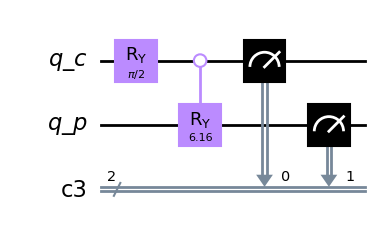

In [45]:
q1.draw('mpl')

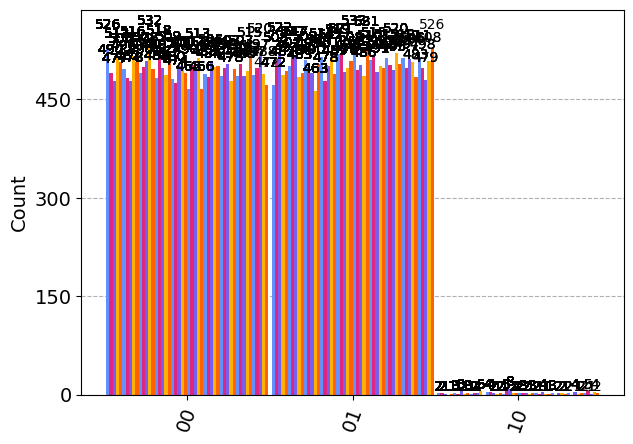

In [172]:
plot_histogram(counts)

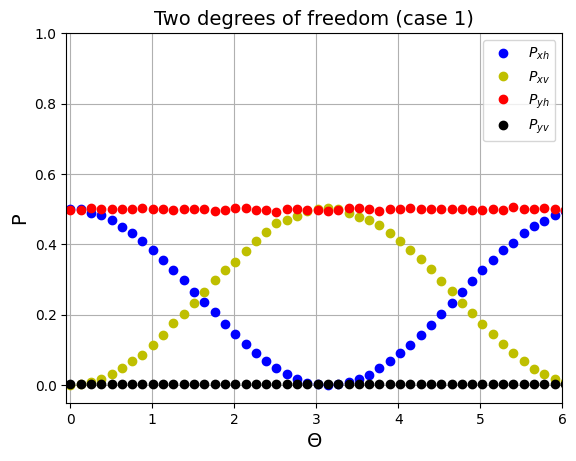

<Figure size 640x480 with 0 Axes>

In [9]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
#ax.plot(x1, f2(x2),color='blue', linewidth=3 ,label="$P_{analytical,xh}$")
#ax.plot(x1, f3(x2),color='yellow', linewidth=3 ,label="$P_{analytical,xv}$")
#ax.plot(x1, f1(x1),color='red', linewidth=3 ,label="$P_{analytical,yh}$")
#ax.plot(x1, f4(x1),color='green', linewidth=3 ,label="$P_{analytical,yv}$")

errorbar(s,p00,fmt='b.',capsize=5,label=r"$P_{xh}$",markersize=12)
errorbar(s,p01,fmt='y.',capsize=5,label=r"$P_{xv}$",markersize=12)
errorbar(s,p10,fmt='r.',capsize=5,label=r"$P_{yh}$",markersize=12)
errorbar(s,p11,fmt='k.',capsize=5,label=r"$P_{yv}$",markersize=12)

ax.set_title('Two degrees of freedom (case 1)', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig2.png', dpi=1000)

In [46]:
p0 = []
for i in range(n):
    p0.append(p00[i]+p01[i])

In [47]:
p1 = []
for i in range(n):
    p1.append(p10[i]+p11[i])

In [48]:
pred = []
for i in range(n):
    pred.append(np.abs(p0[i]-p1[i]))

In [49]:
#pred

$\textbf{Visibility}$

In [50]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p00 = []
p01 = []
p10 = []
p11 = []


#we also consider lists for the standard deviations and errors
dp00 = []
dp01 = []
dp10 = []
dp11 = []

v = [] # to store visibility data for different phi values
theta1 = np.pi/4
p0 = []
p1 = []

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
cr = ClassicalRegister(2)

for theta in s:
    for phi in s:
        q1 = QuantumCircuit(q_c,q_p,cr)
        q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
        q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
        q1.p(phi,q_c[0]) # phase change
        q1.ry(2*theta1,q_c[0]) # 2nd beam-splitter
        #q1.barrier()
        q1.measure(q_c[0],cr[0])
        q1.measure(q_p[0],cr[1])
        job = execute(q1,qasm_simulator,shots = 1000) #implement the simulation
        counts = job.result().get_counts()

            
        #for i in range(50):
        #temp11 = []
        #temp11.append(counts.get('00',0)/1000)
        
        p00.append(counts.get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        p01.append(counts.get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        p10.append(counts.get('01',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        p11.append(counts.get('11',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta
    
        #p00.append(sum(temp11)/1) # takes the prob of 00 to occur for all the values of theta

        #dp00.append(np.std(temp1))
        #dp01.append(np.std(temp2))
        #dp10.append(np.std(temp3))
        #dp11.append(np.std(temp4))
      
        p0.append(counts.get('00',0)/1000+counts.get('10',1)/1000)
        #p1.append(p10+p11)
            
    v.append((max(p0) - min(p0))/(max(p0) + min(p0)))
    p0.clear() 

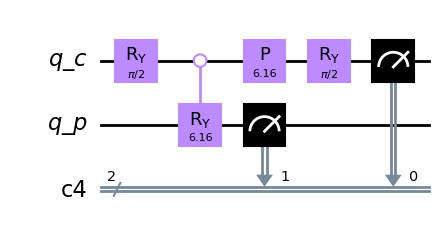

In [51]:
q1.draw('mpl')

In [52]:
def f1(x):
    return np.absolute(np.cos(x/2));
x = np.linspace(0,2*np.pi,150)

In [53]:
@np.vectorize
def f2(x):
    return 0;

In [54]:
def f3(x):
    return (np.sin(x/2))**2;


In [55]:
def f4(x):
    return (np.sin(x/2))**4 + (np.absolute(np.cos(x/2)))**2;

In [56]:
def f5(x):
    return 0.5 * (np.abs((np.cos(x) - 1)/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(np.sin(x/2))) 

In [57]:
def f6(x):
    return (0.5 * (np.abs((np.cos(x) - 1)/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(np.sin(x/2))))**2 + (np.absolute(np.cos(x/2)))**2

C:\Users\juanl\AppData\Local\Temp\ipykernel_10744\2189467660.py:2: RuntimeWarning: invalid value encountered in divide
  return 0.5 * (np.abs((np.cos(x) - 1)/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(np.sin(x/2)))


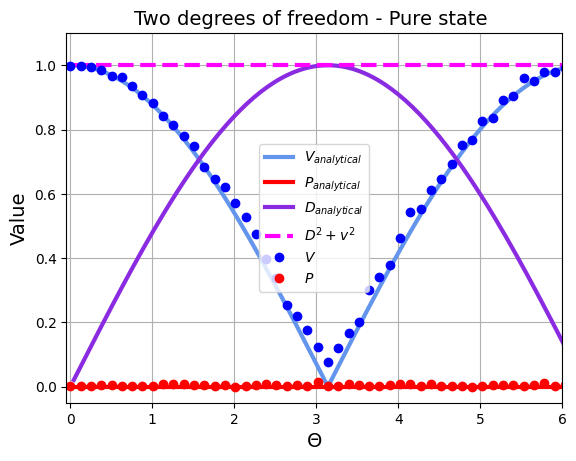

<Figure size 640x480 with 0 Axes>

In [59]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

ax.plot(x, f1(x),color='cornflowerblue', linewidth=3 ,label="$V_{analytical}$")
errorbar(s,v,fmt='b.',capsize=5,label=r"$V$",markersize=12)

ax.plot(x, f2(x),color='red', linewidth=3 ,label="$P_{analytical}$")
errorbar(s,pred,fmt='r.',capsize=5,label=r"$P$",markersize=12)

#ax.plot(x, f3(x),color='green', linewidth=3 ,label="$D_{analytical}$")
#ax.plot(x, f4(x),color='purple', linewidth=3 ,label="$Inequality$")
ax.plot(x, f5(x),color='blueviolet', linewidth=3 ,label="$D_{analytical}$")
ax.plot(x, f6(x),color='magenta', linestyle = 'dashed', linewidth=3 ,label="$D^2+v^2$")

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig2.png', dpi=1000)

$\textbf{Mixed state - symmetric BS}$

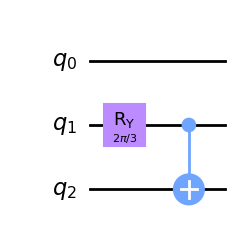

In [196]:
q = QuantumCircuit(3)
q.ry(2*np.pi/3,1) # mixed state \rho = 1/4|h><h|+3/4|v><v|
q.cx(1,2)
q.draw('mpl')

In [198]:
rho_t = qi.DensityMatrix.from_instruction(q)
rho_t.draw('latex',prefix = '\\rho_{AB} = ')

<IPython.core.display.Latex object>

In [199]:
rho_CP = qi.partial_trace(rho_t,[2])
rho_CP.draw('latex',prefix='\\rho_{CP} =')

<IPython.core.display.Latex object>

In [202]:
rho_P = qi.partial_trace(rho_CP,[0])
rho_P.draw('latex',prefix='\\rho_{P} =')

<IPython.core.display.Latex object>

In [203]:
rho_C = qi.partial_trace(rho_CP,[1])
rho_C.draw('latex',prefix='\\rho_{C} =')

<IPython.core.display.Latex object>

$\textbf{Predictability}$

In [62]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p00 = []
p01 = []
p10 = []
p11 = []

#we also consider lists for the standard deviations and errors
dp00 = []
dp01 = []
dp10 = []
dp11 = []

phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta
    temp3 = [] #will store how many 10 values we have for each value of theta
    temp4 = [] #will store how many 11 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        temp3.append(counts[i].get('001',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        temp4.append(counts[i].get('110',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta

    p00.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p01.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    p10.append(sum(temp3)/50) # takes the prob of 10 to occur for all the values of theta
    p11.append(sum(temp4)/50) # takes the prob of 11 to occur for all the values of theta


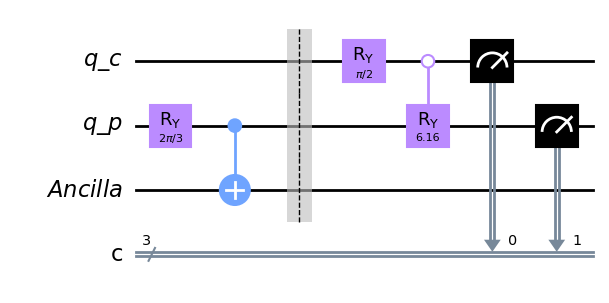

In [63]:
q1.draw('mpl')

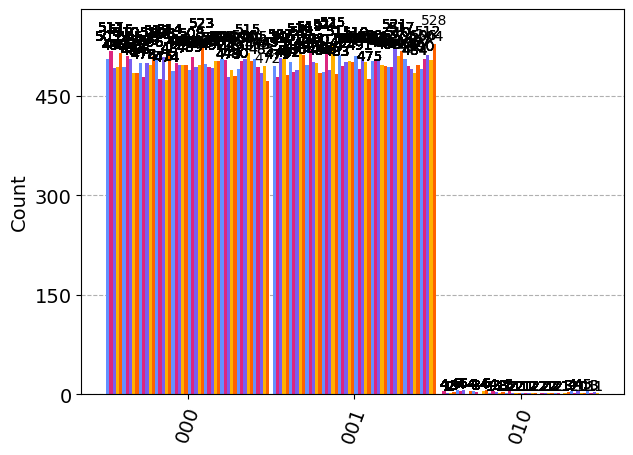

In [217]:
plot_histogram(counts)

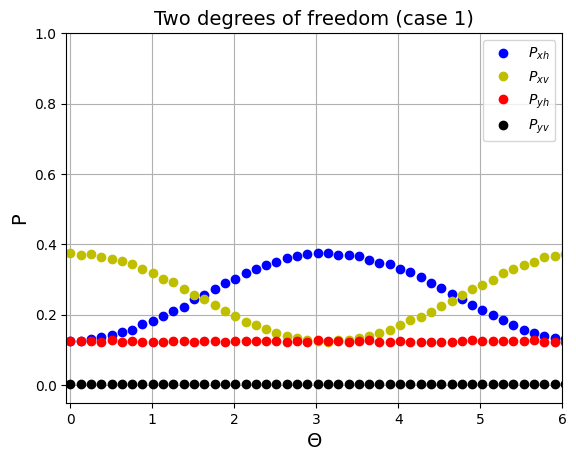

<Figure size 640x480 with 0 Axes>

In [235]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
#ax.plot(x1, f2(x2),color='blue', linewidth=3 ,label="$P_{analytical,xh}$")
#ax.plot(x1, f3(x2),color='yellow', linewidth=3 ,label="$P_{analytical,xv}$")
#ax.plot(x1, f1(x1),color='red', linewidth=3 ,label="$P_{analytical,yh}$")
#ax.plot(x1, f4(x1),color='green', linewidth=3 ,label="$P_{analytical,yv}$")

errorbar(s,p00,fmt='b.',capsize=5,label=r"$P_{xh}$",markersize=12)
errorbar(s,p01,fmt='y.',capsize=5,label=r"$P_{xv}$",markersize=12)
errorbar(s,p10,fmt='r.',capsize=5,label=r"$P_{yh}$",markersize=12)
errorbar(s,p11,fmt='k.',capsize=5,label=r"$P_{yv}$",markersize=12)

ax.set_title('Two degrees of freedom (case 1)', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig2.png', dpi=1000)

In [64]:
p0 = []
p1 = []
for i in range(n):
    p0.append(p00[i]+p01[i])
    p1.append(p10[i]+p11[i])

In [65]:
pred = []
for i in range(n):
    pred.append(np.abs(p0[i]-p1[i]))

In [66]:
#pred

$\textbf{Visibility}$

In [70]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p00 = []
p01 = []
p10 = []
p11 = []


#we also consider lists for the standard deviations and errors
dp00 = []
dp01 = []
dp10 = []
dp11 = []

v = [] # to store visibility data for different phi values
theta1 = np.pi/4
p0 = []
p1 = []

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')
for theta in s:
    for phi in s:
        q1 = QuantumCircuit(q_c,q_p,q_a,cr)
        q1.ry(2*np.pi/3,q_p[0]) # we create a mixed state for polarization
        q1.cx(q_p[0],q_a[0])
        q1.barrier()
        q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
        q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
        q1.p(phi,q_c[0]) # phase change
        q1.ry(2*theta1,q_c[0]) # 2nd symmetric beam-splitter
        q1.barrier()
        q1.measure(q_c[0],cr[0])
        q1.measure(q_p[0],cr[1])
        job = execute(q1,qasm_simulator,shots = 1000) #implement the simulation
        counts = job.result().get_counts()

        p00.append(counts.get('000',0)/1000) #stores how many (relative population) 000 values we have (50 times) for each value of theta 
        p01.append(counts.get('010',1)/1000) #stores how many (relative population) 010 values we have (50 times) for each value of theta
        p10.append(counts.get('001',2)/1000) #stores how many (relative population) 001 values we have (50 times) for each value of theta 
        p11.append(counts.get('110',3)/1000) #stores how many (relative population) 110 values we have (50 times) for each value of theta
    
        #p00.append(sum(temp11)/1) # takes the prob of 00 to occur for all the values of theta

        #dp00.append(np.std(temp1))
        #dp01.append(np.std(temp2))
        #dp10.append(np.std(temp3))
        #dp11.append(np.std(temp4))
      
        p0.append(counts.get('000',0)/1000+counts.get('010',1)/1000)
        #p1.append(p10+p11)
            
    v.append((max(p0) - min(p0))/(max(p0) + min(p0)))
    p0.clear() 

In [71]:
#v

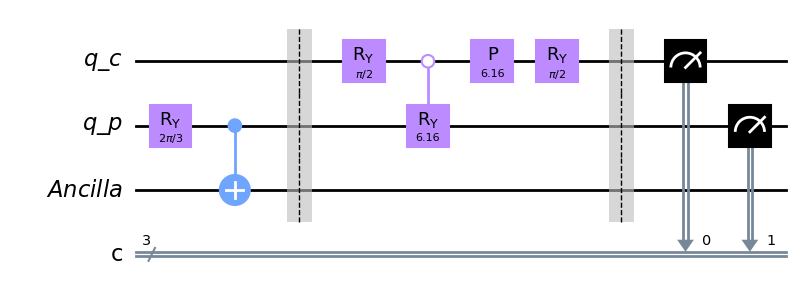

In [72]:
q1.draw('mpl')

In [73]:
ineq = []
for i in range(n):
    ineq.append((pred[i])**2 + (v[i])**2)

In [74]:
x = np.linspace(0,2*np.pi,150)
def f7(x):
    return 0.5*(0.5*np.abs((-1 + np.cos(x))/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(((np.sin(x/2))**2)/(np.sqrt(2 - 2*np.cos(x)))))

In [75]:
def f8(x):
    return np.abs(np.cos(x/2))

In [76]:
def f9(x):
    return (0.5*(0.5*np.abs((-1 + np.cos(x))/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(((np.sin(x/2))**2)/(np.sqrt(2 - 2*np.cos(x))))))**2 + (np.abs(np.cos(x/2)))**2

C:\Users\juanl\AppData\Local\Temp\ipykernel_10744\987990437.py:3: RuntimeWarning: invalid value encountered in divide
  return 0.5*(0.5*np.abs((-1 + np.cos(x))/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(((np.sin(x/2))**2)/(np.sqrt(2 - 2*np.cos(x)))))
C:\Users\juanl\AppData\Local\Temp\ipykernel_10744\987990437.py:3: RuntimeWarning: divide by zero encountered in divide
  return 0.5*(0.5*np.abs((-1 + np.cos(x))/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(((np.sin(x/2))**2)/(np.sqrt(2 - 2*np.cos(x)))))
C:\Users\juanl\AppData\Local\Temp\ipykernel_10744\1302850428.py:2: RuntimeWarning: invalid value encountered in divide
  return (0.5*(0.5*np.abs((-1 + np.cos(x))/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(((np.sin(x/2))**2)/(np.sqrt(2 - 2*np.cos(x))))))**2 + (np.abs(np.cos(x/2)))**2
C:\Users\juanl\AppData\Local\Temp\ipykernel_10744\1302850428.py:2: RuntimeWarning: divide by zero encountered in divide
  return (0.5*(0.5*np.abs((-1 + np.cos(x))/(np.sqrt(2 - 2*np.cos(x)))) + np.abs(((np.sin(x/2))**2)/(np.sqrt(2 -

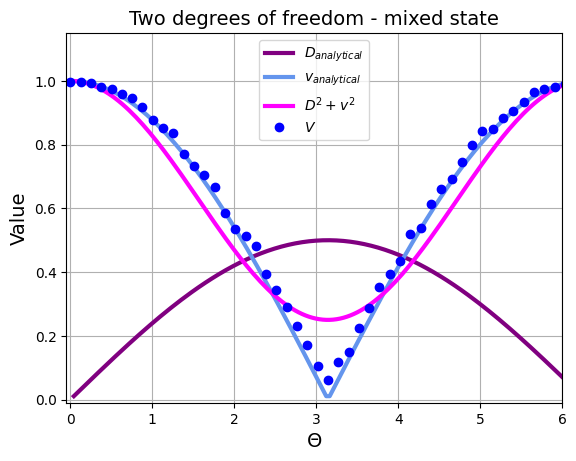

<Figure size 640x480 with 0 Axes>

In [77]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

ax.plot(x, f7(x),color='purple', linewidth=3 ,label="$D_{analytical}$")
errorbar(s,v,fmt='b.',capsize=5,label=r"$V$",markersize=12)

ax.plot(x, f8(x),color='cornflowerblue', linewidth=3 ,label="$v_{analytical}$")

ax.plot(x, f9(x),color='magenta', linewidth=3 ,label="$D^2+v^2$")
#errorbar(s,pred,fmt='r.',capsize=5,label=r"$P$",markersize=12)

#errorbar(s,ineq,fmt='m.',capsize=5,label=r"$Inequality$",markersize=12)

#ax.plot(x, f3(x),color='green', linewidth=3 ,label="$D_{analytical}$")

ax.set_title('Two degrees of freedom - mixed state', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.01, 1.15)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig2.png', dpi=1000)